## Aims of the task:
The dataset for the task of health insurance premium prediction

Step 1:

In [216]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm

In [217]:

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

Step 2:

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [219]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset is therefore ready to be used. After getting the first impressions of this data, I noticed the “smoker” column, which indicates whether the person smokes or not. This is an important feature of this dataset because a person who smokes is more likely to have major health problems compared to a person who does not smoke. So let’s look at the distribution of people who smoke and who do not:


In [220]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: age of primary beneficiary
sex: insurance contractor gender, female or male
bmi: Body mass index
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance

In [221]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [222]:
len(df)

1338

In [167]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [178]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

So let’s look at the distribution of people who smoke and who do not:

In [179]:
import plotly.express as px
df = df
figure = px.histogram(df, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

According to the above visualisation, 547 females, 517 males don’t smoke, and 115 females, 159 males do smoke. It is important to use this feature while training a machine learning model, so now I will replace the values of the “sex” and “smoker” columns with 0 and 1 as both these columns contain string values:

In [180]:
df["sex"] = df["sex"].map({"female": 0, "male": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})
print(df.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


Now let’s have a look at the distribution of the regions where people are living according to the dataset:

In [181]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [182]:
import plotly.express as px
pie = df["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(df, values=population, names=regions)
fig.show()

Now let’s have a look at the correlation between the features of this dataset:

In [183]:
print(df.corr())

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


<AxesSubplot:>

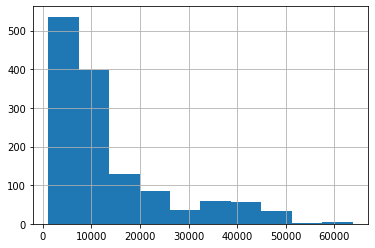

In [184]:
# analizamos variable target
df['charges'].hist()

In [185]:
fig = px.box(df, y="charges")
fig.show()

In [186]:
# charges según sexo
fig = px.box(df, x="sex", y="charges")
fig.show()

In [187]:
# charges según region
fig = px.box(df, x="region", y="charges")
fig.show()

In [188]:
# charges según fumadores
fig = px.box(df, x="smoker", y="charges")
fig.show()

In [189]:
# charges según si tienen hijos
fig = px.box(df, x="children", y="charges")
fig.show()

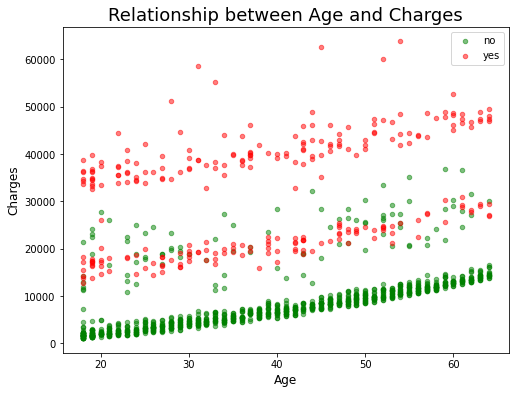

In [223]:
# scatter plot charges según edad, identificando con colores si fuma o no fuma
ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='age', y='charges', color='green', alpha=0.5, figsize=(8,6))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Age and Charges', size=18)
plt.xlabel('Age', size=12)
plt.ylabel('Charges', size=12);


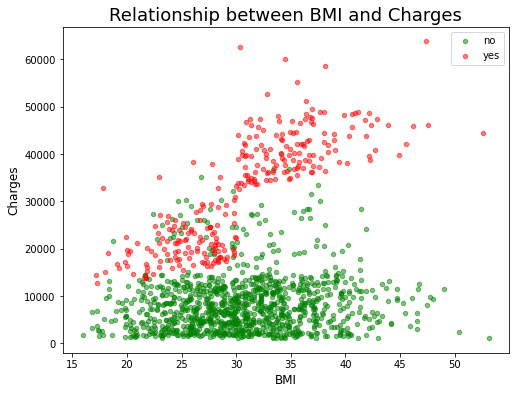

In [224]:
# scatter plot charges según BMI, identificando con colores si fuma o no fuma
ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='green', alpha=0.5, figsize=(8,6))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between BMI and Charges', size=18)
plt.xlabel('BMI', size=12)
plt.ylabel('Charges', size=12);

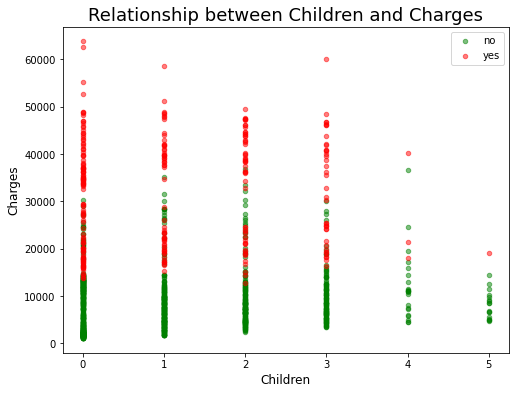

In [225]:
# scatter plot charges según children, identificando con colores si fuma o no fuma
ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='children', y='charges', color='green', alpha=0.5, figsize=(8,6))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='children', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Children and Charges', size=18)
plt.xlabel('Children', size=12)
plt.ylabel('Charges', size=12);

In [193]:
#df.head()

In [194]:
# re categorizo "sexo" en 0 y 1
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)



In [195]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [196]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [197]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [77]:
#función para convertir región a numérico
#def conv_region(region_name):
    #if region_name == 'southwest':
        #return 1
    #elif region_name == 'southeast':
       # return 2
    #elif region_name == 'northwest':
       # return 3
    #elif region_name == 'northeast':
       # return 4
    #else:
       # return 'región sin determinar'
    


In [78]:
#df['region'] = df.apply(lambda x: conv_region(x['region']), axis=1)

In [198]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [199]:
from utils import Helpers

In [200]:
helpers  = Helpers()

In [201]:
helpers.conv_region(region_name='region')

'región sin determinar'

In [202]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [203]:
df['region'] = df.apply(lambda x: conv_region(x['region']), axis=1)

In [204]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
# re categorizo "smoker" en 0 y 1
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


<AxesSubplot:>

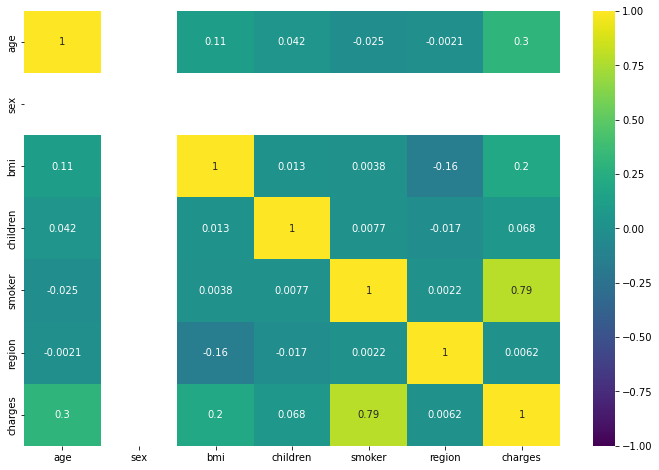

In [205]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)


Step 3 y 4 Linal Regresion:

In [206]:
### modelo regresión lineal
X = df.drop(['charges'], axis=1)
y = df['charges']

In [207]:
# separo en muestras de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
# estimo modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [209]:
# veo los coeficientes
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -13039.782067573791
Coefficients: 
 [ 2.57061458e+02 -6.25277607e-13  3.35751090e+02  4.24964031e+02
  2.36461876e+04  2.71129915e+02]


In [210]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,0,25.175,0,0,4
860,37,0,47.600,2,1,1


In [211]:
# ejemplo
edad = 33
sex = 1
bm = 22
children = 0
smoker = 1
region = 3

In [212]:
# predigo target (charges) según datos de ejemplo
print('Predicted prima : \n', regr.predict([[edad,sex,bm,children,smoker,region]]))


Predicted prima : 
 [27289.34731956]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Step 4:

Now let’s move on to training a machine learning model for the task of predicting health insurance premiums. First, I’ll split the data into training and test sets:

In [213]:
## training a ml model
x = np.array(df[["age", "sex", "bmi", "smoker"]])
y = np.array(df["charges"])
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

After using different machine learning algorithms, I found the random forest algorithm as the best performing algorithm for this task. So here I will train the model by using the random forest regression algorithm:

In [214]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

Now let’s have a look at the predicted values of the model:

In [215]:
ypred = forest.predict(xtest)
df= pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(df.head())

   Predicted Premium Amount
0               9113.593140
1               5412.261391
2              28430.845358
3               9610.750070
4              35112.962297


So this is how you can train a machine learning model for the task of health insurance premium prediction using Python.

Summary
The premium amount of a health insurance policy depends on person to person as many factors affect the premium amount of a health insurance policy. 
